In [ ]:
import sys

sys.path.append("../src")

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [39]:
from loader import load_data

In [40]:
sns.set_style("whitegrid")

In [54]:
data = pd.read_csv("../data/bewertungen.csv", parse_dates=["Datum"], dayfirst=True)
data.tail()


,WochenID,FolgenID,Datum,Ort,K1,K2,K3,K4,K5,Summe,M,A,C,Person,Bemerkung,YT-Link
34,8,1976,2013-12-02,Berlin,NaN,7.0,8.0,7.0,8.0,30,8.0,7.0,7.0,Katharina,U30,https://www.youtube.com/watch?v=SN1KuiYpFik
35,8,1977,2013-12-03,Berlin,6.0,NaN,7.0,7.0,7.0,27,7.0,8.0,7.0,Nydal,U30,https://www.youtube.com/watch?v=SN1KuiYpFik
36,8,1978,2013-12-04,Berlin,7.0,7.0,NaN,8.0,8.0,30,7.0,8.0,8.0,Claudia,U30,https://www.youtube.com/watch?v=SN1KuiYpFik
37,8,1979,2013-12-05,Berlin,8.0,6.0,9.0,NaN,9.0,32,4.0,3.0,3.0,Lukas,"U30, 8h-Dinner",https://www.youtube.com/watch?v=SN1KuiYpFik
38,8,1980,2013-12-06,Berlin,7.0,5.0,8.0,6.0,NaN,26,8.0,8.0,7.0,Cissy,U30,https://www.youtube.com/watch?v=SN1KuiYpFik


<Axes: xlabel='Summe', ylabel='Density'>

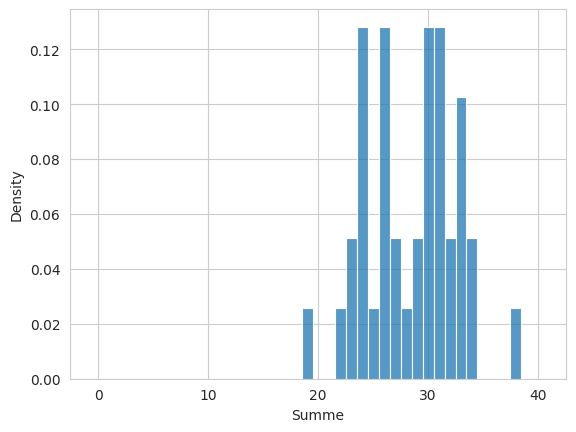

In [42]:
sns.histplot(
    data=data["Summe"],
    stat="density",
    discrete=True,
    binrange=(0, 40),
)

In [43]:
# füge eine spalte "tag in woche hinzu"
data["tag_in_woche"] = data.groupby("WochenID").cumcount() + 1

In [ ]:
# betrachte nur wochen mit 5 tagen
filtered_data = data.groupby("WochenID").filter(lambda x: len(x) == 5)

# filtered_data

In [ ]:
# durchschnittliche punkte nach wochentag
mean_punkte_tag = (
    filtered_data[["tag_in_woche", "Summe"]].groupby("tag_in_woche").mean()
)  # .boxplot(column="Summe")
mean_punkte_tag

,Summe
tag_in_woche,
1,28.428571
2,27.571429
3,28.714286
4,30.142857
5,30.571429


In [46]:
mean_punkte_tag - mean_punkte_tag["Summe"].mean()

,Summe
tag_in_woche,
1,-0.657143
2,-1.514286
3,-0.371429
4,1.057143
5,1.485714


<Axes: xlabel='tag_in_woche', ylabel='Probability'>

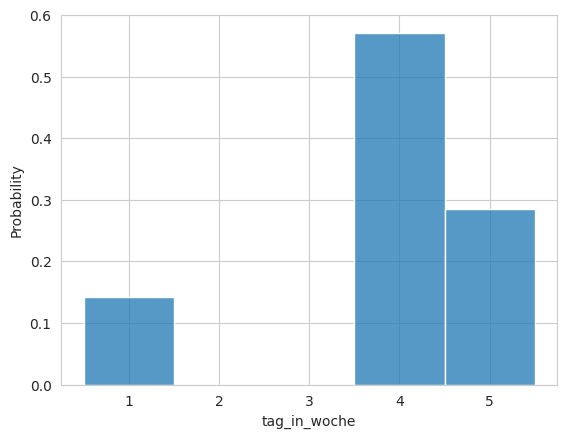

In [ ]:
# an welchen tagen wurde gewonnen?

erster_platz = filtered_data.loc[filtered_data.groupby("WochenID")["Summe"].idxmax()]

# erster_platz.plot.hist(column="tag_in_woche", bins=5, discrete=True)

sns.histplot(erster_platz["tag_in_woche"], discrete=True, stat="probability")

In [ ]:
erster_platz[erster_platz["tag_in_woche"] == 4].count() / erster_platz.count()

WochenID        0.571429
FolgenID        0.571429
Datum           0.571429
Ort             0.666667
K1              0.666667
K2              0.571429
K3              0.571429
K4              0.000000
K5              0.800000
Summe           0.571429
M               0.500000
A               0.666667
C               0.666667
Person          0.571429
Bemerkung       0.500000
YT-Link         1.000000
tag_in_woche    0.571429
dtype: float64

<Axes: xlabel='tag_in_woche', ylabel='Probability'>

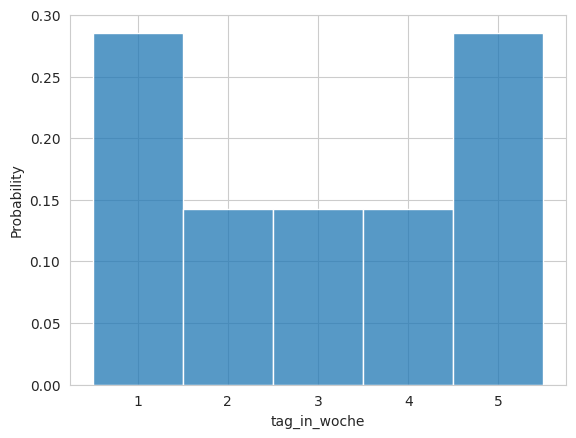

In [49]:
# letzter platz

letzter_platz = filtered_data.loc[filtered_data.groupby("WochenID")["Summe"].idxmin()]

sns.histplot(letzter_platz["tag_in_woche"], discrete=True, stat="probability")

In [50]:
mean_punkte_tag["Summe"].mean()

np.float64(29.08571428571429)

In [ ]:
print(
    f"Fun Fact: Der durchschnittliche Kandidat bekommt {round(mean_punkte_tag['Summe'].mean(), 1)} Punkte."
)

Fun Fact: Der durchschnittliche Kandidat bekommt 29.1 Punkte.


In [ ]:
wkt_sieg_donnerstag = round(
    (erster_platz[erster_platz["tag_in_woche"] == 4].count() / erster_platz.count())[
        "Summe"
    ],
    1,
)
wkt_sieg_freitag = round(
    (erster_platz[erster_platz["tag_in_woche"] == 5].count() / erster_platz.count())[
        "Summe"
    ],
    1,
)

print(
    f"Fun Fact: Donnerstag ist der Siegertag. Wer am Donnerstag kocht gewinnt in {wkt_sieg_donnerstag}% der Fälle, wer am Freitag kocht zu {wkt_sieg_freitag}% "
)

Fun Fact: Donnerstag ist der Siegertag. Wer am Donnerstag kocht gewinnt in 0.6% der Fälle, wer am Freitag kocht zu 0.3% 
